<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 3

## Q1: Lag correlations of weather time series

In [1]:
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib nbagg
%matplotlib inline
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]

**1** From the hourly time series at Deep Cove (`dc`), calculate the *lag correlation co-efficient* $\rho_{xx}(\tau)$ out to a lag of $\tau=30\ \mathrm{days}$ (Remember this data is hourly!).  (also remember to remove the mean of $dc$ before trying to do the calculations).  

Comment on the resulting plot.

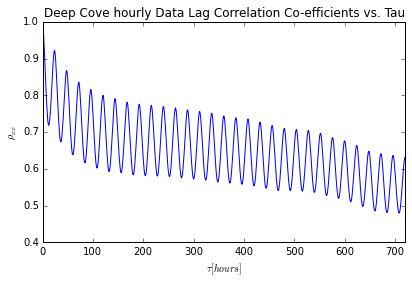

In [2]:
# Setup the data
Nt = 30*24 # hours in 30 days
x = dc[~np.isnan(dc)] # remove invalid data
x = x - np.mean(x) # remove the mean of dc
lags = range(0,Nt) # the lags are hourly integers from 0 to 30 days

# calculate lag auto covariances
cxx = 0.*np.array(lags) 
for ind,tau in enumerate(lags):
    if tau==0:
        cxx[ind] = np.var(x)
    else:
        cxx[ind] = np.mean(x[:-tau]*x[tau:])

# Calculate lag correlation co-efficients
rhoxx = cxx/np.var(x)

# Plot
fig,ax=plt.subplots(1,1)
ax.plot(lags,rhoxx)
ax.set_xlabel(r'$\tau [hours]$')
ax.set_ylabel(r'$\rho_{xx}$')
ax.set_title('Deep Cove hourly Data Lag Correlation Co-efficients vs. Tau')
ax.set_xlim([0,Nt])

plt.tight_layout()     

The plot shows that with no lag, the data is 100% related which is expected as the data with zero lag is exactly the same as the data. As the lag increases, the correlation decreases, which is also expected. The correlation does not, however, decrease linearly - instead it decreases periodically, with peaks at intervals of 24 hours and valleys at half-intervals between the peaks. Since the lag correlation co-efficients are largest when tao is a multiple of 24 hours, we infer that the data at the same time across multiple days is similar (for example, data taken at 7am on day 1 is similar to data taken at 7am on day 2). The opposite can be said for data taken 12 hours apart across multiple days; it is less related.

*2* Now, instead of doing the whole year, look at just the winter months and the summer months and compare the lag correlations (no need to do this for the whole time series, just choose one winter and one summer).  Make sure to indicate which lag correlation is which on the plots.

Comment below on the different charcter of these two lag correlations.

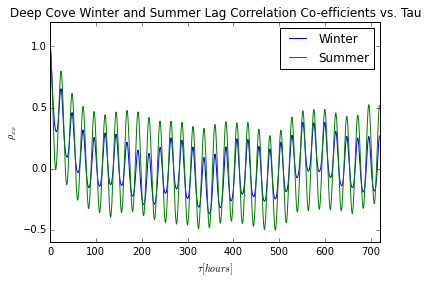

In [3]:
# Hours in one season assuming winter and summer are each 1/4 of the year
hours = 24*365/4

# Winter is 1st quarter of the year
x_winter = dc[0:hours]
x_winter = x_winter[~np.isnan(x_winter)] # remove invalid data
x_winter = x_winter - np.mean(x_winter) # remove the mean of dc
cxx_winter = 0.*np.array(lags)


# Summer is 3rd quarter of the year
x_summer = dc[2*hours:3*hours]
x_summer = x_summer[~np.isnan(x_summer)] # remove invalid data
x_summer = x_summer - np.mean(x_summer) # remove the mean of dc
cxx_summer = 0.*np.array(lags)

# calculate lag auto covariances
for ind,tau in enumerate(lags):
    if tau==0:
        cxx_winter[ind] = np.var(x_winter)
        cxx_summer[ind] = np.var(x_summer)
    else:
        cxx_winter[ind] = np.mean(x_winter[:-tau]*x_winter[tau:])
        cxx_summer[ind] = np.mean(x_summer[:-tau]*x_summer[tau:])

# Calculate lag correlation co-efficients
rhoxx_winter = cxx_winter/np.var(x_winter)
rhoxx_summer = cxx_summer/np.var(x_summer)

# Plot
fig,ax=plt.subplots(1,1)
ax.plot(lags,rhoxx_winter,label='Winter')
ax.plot(lags,rhoxx_summer,label='Summer')
ax.legend(loc=0)
ax.set_xlabel(r'$\tau [hours]$')
ax.set_ylabel(r'$\rho_{xx}$')
ax.set_title('Deep Cove Winter and Summer Lag Correlation Co-efficients vs. Tau')
ax.set_xlim([0,Nt])

plt.tight_layout() 


The winter and summer lag correlations are similar in that they both have peaks at the 24 hour marks, and valleys half-way between these. The reasoning would be similar to that from the previous question (i.e. same time during different days are more related than different times during same days). The difference in the character of these two correlations, though, is that the summer correlations vary more than the winter ones. In the summer, the large correlations are larger and the small correlations are smaller. This could mean that the temperatures during winter days stay more consistent from morning to night, and the temperatures at during the summer days fluctuate more. For example, a winter day might be cold all day long, but a summer day might be hot at noon and cool off in the evening.

## Q2 Emperically show that the expected value of a finite spectrum approaches the true spectrum as T goes to infinity.

**1** Consider the process $x(t) = \int_{t-b}^t y(t) \ \mathrm{dt}$ where $y(t)$ is uncorrelated white noise so that $R_{yy}(\tau)=\delta(\tau)$.  Using the definition of $R_{xx}(\tau)$, and the fact that expectation values (and integration) are linear operators, analytically show that this is a triangle function: 

\begin{equation}
    R_{xx}(\tau)=
    \begin{cases}
        b-|\tau| & |\tau|<b\\
        0 & |\tau|\geq b
    \end{cases}
\end{equation}

**2** Show emperically that you have the right *lag auto correlation* by computing the lag correlation of a random discrete timeseries $x(t)$. 

Hint: have a look at `np.convolve` to do the integration. 

Hint 2: Make sure your time series is long enough to get a nice representation of $R_{xx}(\tau)$.  Show what happens if N is too small and what happens if it gets larger. To do this well,  I used `N in [500, 5000, 50000, 5e6]`, but my machine has a good amount of memory.  Don't *test* on the bigger values, as it is slow, just add them for the final product!

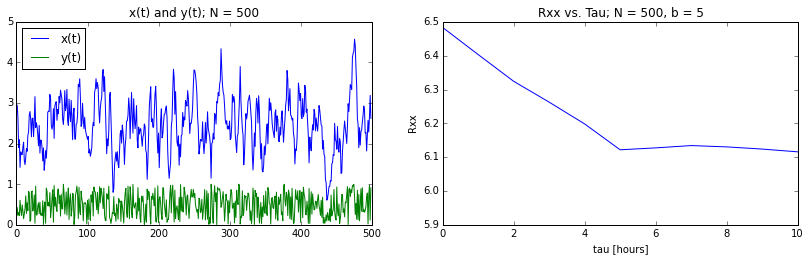

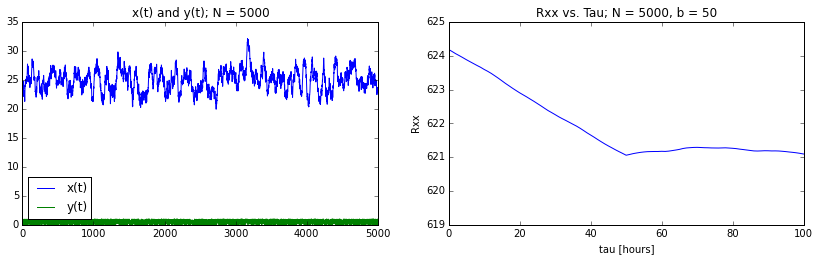

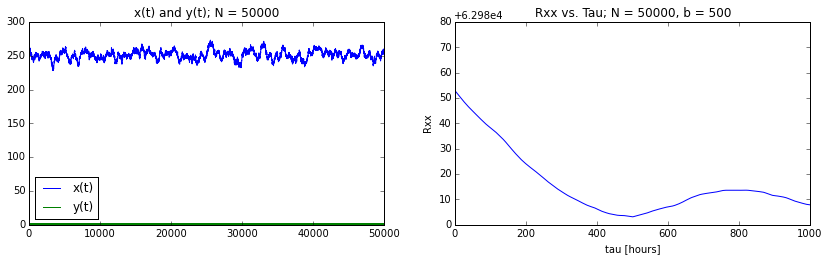

In [ ]:
def plotR(N,b):
    t = np.arange(N)
    y = np.zeros(N)
    lags = range(N/10)
    tau = np.array(lags)*np.median(np.diff(t))

    for i in range(N):
        y[i] = np.random.rand()
    
    x = np.zeros(N)
    for j in range(N):
        value = 0.
        for i in range(j-b,j):
            value += y[i]
        x[j] = value

    # Calculate the lag correlations
    Rxx = 0.*np.array(lags)    
    for ind,this_tau in enumerate(tau):
        if this_tau==0:
            Rxx[ind] = np.mean(x*x)
        elif this_tau<0:
            Rxx[ind] = np.mean(x[:this_tau]*x[-this_tau:])
        else: # tau>0
            Rxx[ind] = np.mean(x[:-this_tau]*x[this_tau:])
            
    # Create the new grid
    plt.figure(figsize=(14,8))        # Make figure
    gs=gridspec.GridSpec(2,2)         # Set up the layout
            
    # Plot y and x as functions of t
    ax = plt.subplot(gs[0])
    ax.plot(t,x,label='x(t)')
    ax.plot(t,y,label='y(t)')
    ax.legend(loc=0)
    ax.set_title('x(t) and y(t); N = %1d' % N)

    # Plot Rxx
    ax2 = plt.subplot(gs[1])
    ax2.plot(lags,Rxx)
    ax2.set_xlabel('tau [hours]')
    ax2.set_ylabel('Rxx')
    ax2.set_title('Rxx vs. Tau; N = {0}, b = {1}'.format(N,b))
    ax2.set_xlim([0,2.*b])

# Plot all the Rxx's for various values of N
Nvalues = [500,5000,50000]#,5000000]
for N in Nvalues:
    b = N/100
    plotR(N,b)


From the above graphs we can see that if N is too large, the triangular plot changes into being more curved, and it flattens out less around the 'b' point than previously. It does not intersect the x-axis, as it did when N was smaller. For very large N (N=50000) the graph does not have any point at all at the 'b' coordinate. For very small N (ex. N=2), we would not have enough data to see the trend.

**3** Derive (or look up) $S_{xx}(f)$ of this process:

$S_{xx}(f)=∫^{∞}_{−∞}(B-|τ|)e^{−j2πfτ}dτ$ for $|τ|<b$ 
 and $S_{xx}(f)=0$ otherwise.

**4** Demonstrate with finite values of $T$ that $\lim_{T->\infty}S_{xx}(f,T) = S_{xx}(f)$ does *not* converge to $S_{xx}(f)$.  Do this by taking longer values of $T$, fitting to the same set of $f$, and graphically showing that the spectral estimate does not improve.  (Do **not** use canned `fft` routines, unless you prove they work first.)

Hints: 
  - When you choose your discrete values of $f$, make sure you don't choose them to be too high (i.e. if you define $\Delta t=1 \ \mathrm{s}$ in your time series above, then there is no need to have frequencies greater than 1 Hz; actually no need to have them greater than 0.5 Hz, as we will see in the next lecture.
  - I would recommend writing a small funtion to do the integration for the Fourier Transform so that you are not rewriting the same code.  To do this, you would do something like:

```python
def dft(x,dt,f): 
    # where x is your time series, dt is the sample rate in seconds, 
    # and f are the frequencies in Hz you want the Fourier Series calculated on
    
    # Your code in here
    return X # where X is your Fourier tranform
```

  - Choose the length of your spectra to go up by decades (i.e. 500,5000,...)
  - use `ax.loglog(f,X)` to make your plots.  We almost always plot spectra using `loglog`.



In [ ]:
def dft(x,dt,f,T):
    X = 0. # placeholder for the Fourier Transform
    
    for i in range(T):
        X += x[i]*np.exp(-j*2.*np.pi*f*t)
    
    return X # the Fourier Transform

# compute Sxx(f,T) for increasing values of T
Tvalues = [500,5000,5e4,5e5] # finite values of T

for k in Tvalues:
    N = int(k)
    t = np.arange(N)
    y = np.zeros(N)
    lags = range(N/10)
    b = N/100
    tau = np.array(lags)*np.median(np.diff(t))

    # create correct number of frequencies
    f = np.linspace(-0.5,0.5,N)
    
    # create y of correct length
    for i in range(N):
        y[i] = np.random.rand()
    
    # create of correct length
    x = np.zeros(N)
    for j in range(N):
        value = 0.
        for i in range(j-b,j):
            value += y[i]
        x[j] = value
        
    # compute Sxx(f,T) for current value of T
    T = int(k)
    X = dft(x,1,f,T) 
    SxxfT = X * np.conj(X) / T
    
    # plot
    plt.figure(figsize=(14,8))        # Make figure
    gs=gridspec.GridSpec(1,1)        # Set up the layout
    ax = plt.subplot(gs[0])
    ax.plot(t,x,label='frequency (Hz)')
    ax.plot(t,y,label='Sxx(f,T)')
    ax.legend(loc=0)
    ax.set_title('Sxx(f,T) vs. frequency; N = %1d' % N)
    ax.loglog()

YOUR ANSWER HERE

**5** Now demonstrate that the *expected value* of 

$$E\left[\lim_{T->\infty}S_{xx}(f,T)\right]$$ 

approaches $S_{xx}(f)$ by *averaging* a number of your moderate lengthed spectral estimates together.  Comment on the form of the spectrum relative to how you made the timeseries.

Hints:
  
  - Just do what you did above, but average the results of `navg` non-overlapping segments of data.  
  - This gets computationally expensive, I did `navg` of `1, 5, 50, 100` and got nice results.  Test your code on just `navg` of `1` and `5`, and when its working add the higher numbers.

In [ ]:
print np.navg(1)


YOUR ANSWER HERE